### PROJETO: PREVISÃO DE SCORE DE CRÉDITO (MACHINE LEARNING)
### de crédito de uma instituição financeira, classificando clientes em:
### Poor (Ruim), Standard (Padrão) ou Good (Bom).

In [2]:
%pip install matplotlib seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------------- -------------- 5.2/8.1 MB 27.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 24.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 31.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 34.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# 1. Importação das Bibliotecas Necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ferramentas de Machine Learning do Scikit-Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Configuração para ignorar avisos (warnings)
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [4]:
# 2. Carregamento e Análise Inicial dos Dados
# Carregando a base histórica de clientes
tabela = pd.read_csv("clientes.csv")

print("Visualização inicial da base de dados:")
display(tabela.head())

print("\nInformações sobre os tipos de dados e valores nulos:")
# É crucial verificar se há dados faltando (NaN) e os tipos (int, float, object)
display(tabela.info())

Visualização inicial da base de dados:


,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.46538,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.46538,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.46538,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.46538,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.46538,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0



Informações sobre os tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  obje

None

In [5]:
# 3. Pré-processamento de Dados (Data Cleaning)
# Máquinas não entendem texto diretamente. É preciso converter colunas
# categóricas (como 'profissão') em números. Usarei o LabelEncoder para isso.

codificador = LabelEncoder()

# Lista das colunas que são texto e precisam ser transformadas
colunas_texto = ["profissao", "mix_credito", "comportamento_pagamento"]

# Aplicando a transformação em loop
for coluna in colunas_texto:
    tabela[coluna] = codificador.fit_transform(tabela[coluna])

print("\nDados após a codificação das variáveis de texto:")
display(tabela.head())


Dados após a codificação das variáveis de texto:


,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.46538,1,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.46538,3,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.46538,5,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,2,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.46538,4,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,2,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.46538,2,341.489231,Good,1,1,1,1,0


In [6]:
# 4. Separação dos Dados para Treino e Teste
# O 'y' é o alvo (o que queremos prever).
# O 'x' são as características (features) que usaremos para tentar acertar o alvo.

y = tabela["score_credito"]

# Remove a coluna alvo (score_credito) e o id_cliente (que é inútil para a previsão)
x = tabela.drop(columns=["score_credito", "id_cliente"])

# Dividindo: 70% para a IA estudar (treino) e 30% para aplicar a "prova" final (teste)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [7]:
# 5. Criação e Treinamento dos Modelos de IA 
# Vamos testar dois algoritmos clássicos:
# 1. Random Forest: Cria várias "árvores de decisão" e faz uma votação. Geralmente robusto.
# 2. KNN (Vizinhos Próximos): Classifica com base na similaridade com dados vizinhos.

modelo_arvoredecisao = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()

print("\nIniciando o treinamento dos modelos...")
# O método .fit() é onde a mágica acontece: a IA está "estudando" os dados de treino.
modelo_arvoredecisao.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)
print("Modelos treinados com sucesso!")



Iniciando o treinamento dos modelos...
Modelos treinados com sucesso!


In [8]:
# 6. Avaliação de Desempenho (Acurácia) 
# Agora usei os modelos para prever os dados de teste (que eles nunca viram antes)
previsao_arvore = modelo_arvoredecisao.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste)

# Comparei a previsão com o gabarito real (y_teste)
acuracia_arvore = accuracy_score(y_teste, previsao_arvore)
acuracia_knn = accuracy_score(y_teste, previsao_knn)

print(f"\n=== Resultado da Avaliação ===")
print(f"Acurácia Random Forest: {acuracia_arvore:.2%}")
print(f"Acurácia KNN: {acuracia_knn:.2%}")

# O Random Forest venceu. Vou seguir com ele.


=== Resultado da Avaliação ===
Acurácia Random Forest: 82.60%
Acurácia KNN: 73.24%


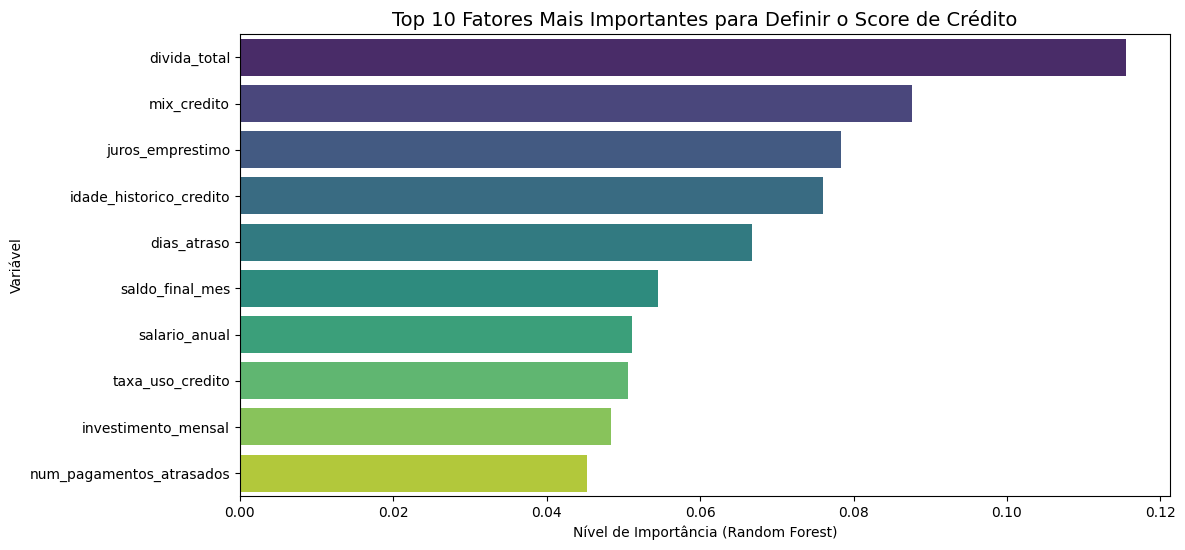

In [9]:
# 7. Interpretando o Modelo: O que define o Score? 
# Vamos visualizar quais colunas foram mais importantes para a decisão do Random Forest.

importancia_features = pd.DataFrame({
    'Feature': x_treino.columns,
    'Importancia': modelo_arvoredecisao.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importancia', y='Feature', data=importancia_features.head(10), palette='viridis')
plt.title('Top 10 Fatores Mais Importantes para Definir o Score de Crédito', fontsize=14)
plt.xlabel('Nível de Importância (Random Forest)')
plt.ylabel('Variável')
plt.show()

In [11]:
# 8. Simulação em Produção: Prevendo Novos Clientes
print("\n--- Carregando novos clientes para previsão ---")
novos_clientes = pd.read_csv("novos_clientes.csv")

# Tratamento dos dados (mesmo do treino)
for coluna in colunas_texto:
    novos_clientes[coluna] = codificador.fit_transform(novos_clientes[coluna])

# Fazendo a previsão
previsoes_final = modelo_arvoredecisao.predict(novos_clientes)

print("Previsões realizadas para os novos clientes:")

# Adicionando o resultado ao dataframe
novos_clientes['SCORE_PREVISTO'] = previsoes_final

display(novos_clientes.head())

print("\nDistribuição dos Scores Previstos:")
print(pd.Series(previsoes_final).value_counts())


--- Carregando novos clientes para previsão ---
Previsões realizadas para os novos clientes:


,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil,SCORE_PREVISTO
0,1,31.0,1,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,...,218.0,44.50951,1,312.487689,1,1,0,0,0,Poor
1,4,32.0,0,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,...,12.0,0.00000,2,300.994163,0,0,0,0,1,Good
2,2,48.0,1,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,...,215.0,0.00000,0,345.081577,0,1,0,1,0,Good



Distribuição dos Scores Previstos:
Good    2
Poor    1
Name: count, dtype: int64
